# LAB WORK NO.1 - Homographies for Computer Vision

## Table of contents


1. [Required libraries](#Required-libraries)

2. [Load the images](#Load-the-images)

2. [Task 1](#Task-1)

3. [Task 2](#Task-2)

4. [Task 3](#Task-3)

5. [Task 4](#Task-4)

## Required libraries
[[go back to the top] ](#Table-of-contents)

In [279]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import math


## Load the images
[[go back to the top] ](#Table-of-contents)

In [280]:
# Define img dir in a var
image_dir = "images/"

## Task 1
[[go back to the top] ](#Table-of-contents)

In [281]:
# Load object and scene images 
# Comment out the examples you don't want to run

# example 1: wally and wally_scene
# object_img = cv2.imread(os.path.join(image_dir, 'wally.png'))
# scene_img = cv2.imread(os.path.join(image_dir, 'find_wally.jpeg'))
# example 2: box and box_scene
# object_img = cv2.imread(os.path.join(image_dir, 'match_box01a_1.png'))
# scene_img = cv2.imread(os.path.join(image_dir, 'match_box01a_2.png'))
# example 3: elephant and scene
object_img = cv2.imread(os.path.join(image_dir, 'match_scene01_2.png'))
scene_img = cv2.imread(os.path.join(image_dir, 'match_scene01_3.png'))
# example 4: box2 and scene
# object_img = cv2.imread(os.path.join(image_dir, 'match_scene01_1.png'))
# scene_img = cv2.imread(os.path.join(image_dir, 'match_scene01_3.png'))


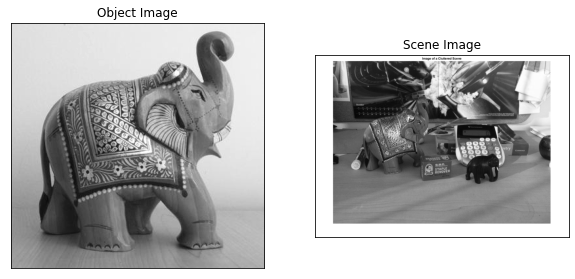

In [282]:
# Convert images to grayscale
object_gray = cv2.cvtColor(object_img, cv2.COLOR_BGR2GRAY)
scene_gray = cv2.cvtColor(scene_img, cv2.COLOR_BGR2GRAY)

# Display
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(object_gray, cmap = 'gray')
plt.title('Object Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(scene_gray, cmap = 'gray')
plt.title('Scene Image'), plt.xticks([]), plt.yticks([])
plt.show()


### Key Points and Descriptors detection

Run one of the following cells to detect the keypoints and descriptors of the images.  
- SIFT
- ORB
- AKAZE
- BRISK
- KAZE

#### SIFT

In [283]:
# Feature detector
# SIFT-0 (Scale Invariant Feature Transform)
# ORB-1 (Oriented FAST and Rotated BRIEF)
# BRISK-2 (Binary Robust Invariant Scalable Keypoints)
# KAZE-3 (Accelerated-SIFT)
# AKAZE-4 (Accelerated-KAZE)
option = 0
match option:
    case 0:
        fd =cv2.SIFT_create()
    case 1:
        fd =cv2.ORB_create()
    case 2:
        fd =cv2.BRISK_create()
    case 3:
        fd =cv2.KAZE_create()
    case 4:
        fd =cv2.AKAZE_create()      
    case _:
        fd =cv2.SIFT_create()

# Find the keypoints and descriptors

kp1, des1 = fd.detectAndCompute(object_gray,None)
kp2, des2 = fd.detectAndCompute(scene_gray,None)    

### Matching

In [284]:
# TODO TRY ANOTHER MATCHER
# Match descriptors
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)


### Outliers removal

##### Lowe Ratio Test

In [285]:
# TODO: test different ratio values
# Apply ratio test
good = []
for match_pair in matches:
    if len(match_pair) == 2:
        m, n = match_pair
        if m.distance < 0.75 * n.distance:
            good.append(m)
    

##### RANSAC

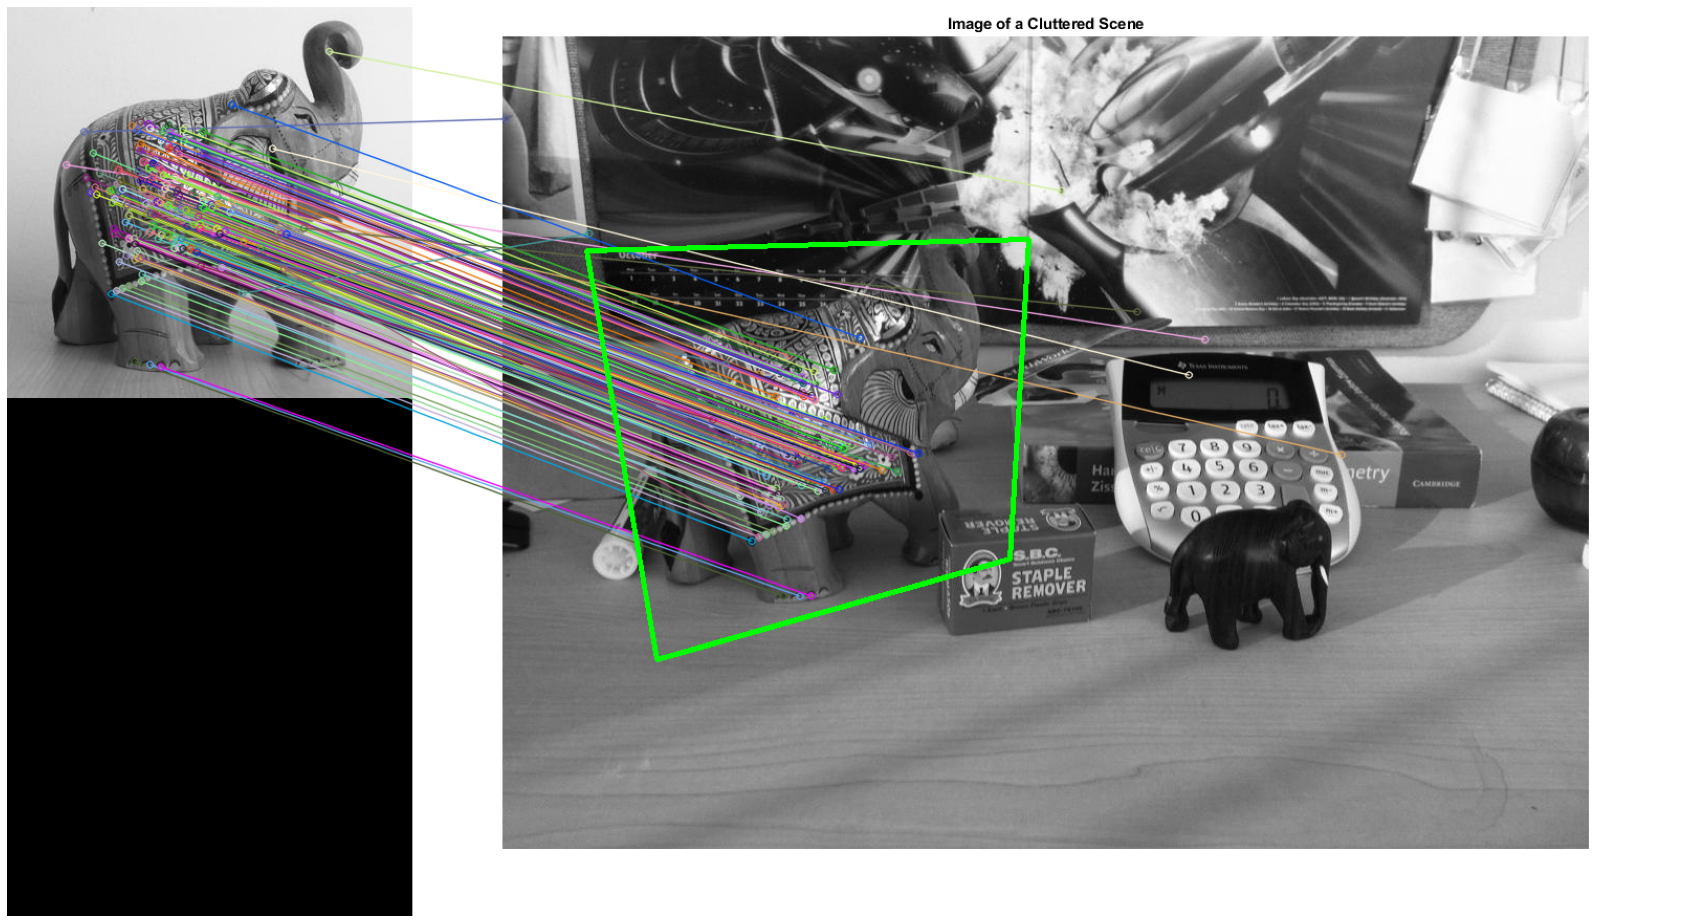

In [286]:
# TODO: test different parameters; influence of using the RANSAC method or not

# Draw matches
img_matches = cv2.drawMatches(object_img, kp1, scene_img, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_matches = cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB)
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

# Find the object in the scene
object_corners = np.float32([[0, 0], [object_img.shape[1], 0], [object_img.shape[1], object_img.shape[0]], [0, object_img.shape[0]]])
scene_corners, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC)
scene_corners = cv2.perspectiveTransform(object_corners.reshape(-1, 1, 2), scene_corners).reshape(-1, 2)

# Draw lines around the object in the scene
for i in range(4):
    pt1 = (int(scene_corners[i][0] + object_img.shape[1]), int(scene_corners[i][1]))
    pt2 = (int(scene_corners[(i+1)%4][0] + object_img.shape[1]), int(scene_corners[(i+1)%4][1]))
    cv2.line(img_matches, pt1, pt2, (0, 255, 0), 4)


# Show detected matches
plt.figure(figsize=(30,30))
plt.axis('off')
plt.imshow(img_matches, cmap = 'gray')
#plt.savefig('results/task1/wally.png')
plt.show()


## Task 2
[[go back to the top] ](#Table-of-contents)

## Task 3
[[go back to the top] ](#Table-of-contents)

## Task 4
[[go back to the top] ](#Table-of-contents)

### Load the images

In [356]:
# 4 images of road lanes
img = cv2.imread(os.path.join(image_dir, 'lane1.jpg'))
img2 = cv2.imread(os.path.join(image_dir, 'lane2.png'))
img3 = cv2.imread(os.path.join(image_dir, 'lane3.jpg'))
img4 = cv2.imread(os.path.join(image_dir, 'lane4.png'))

images = [img, img2, img3, img4]
imgs_copy = [img.copy(), img2.copy(), img3.copy(), img4.copy()]

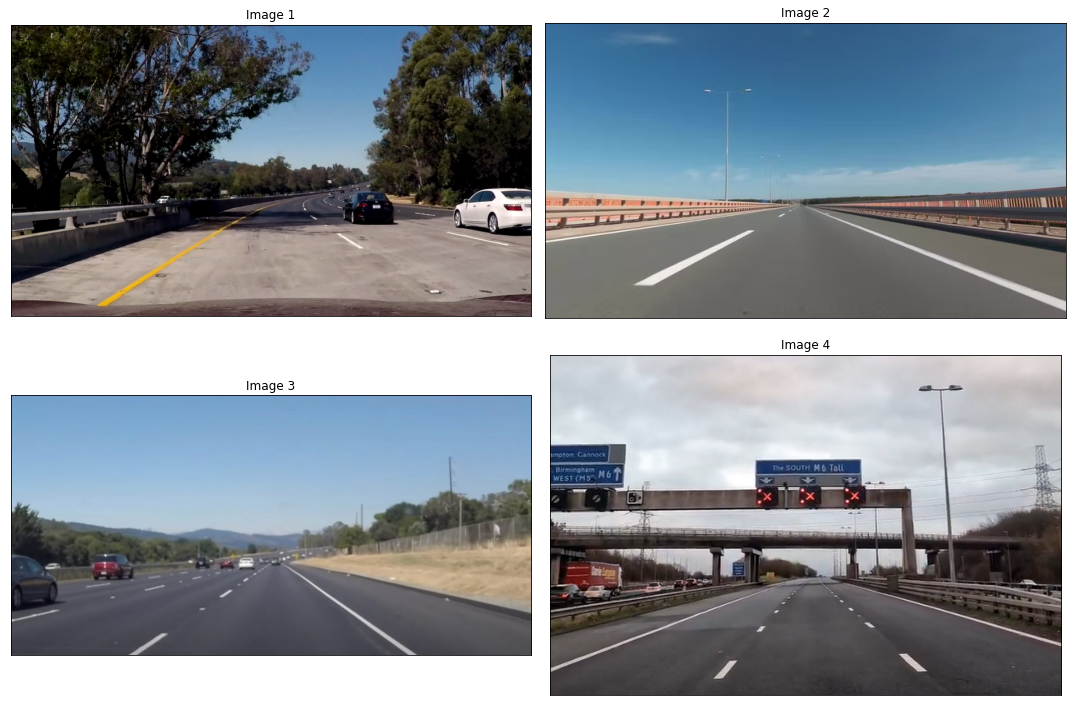

In [357]:
def display_imgs(img,img2,img3,img4, cmap=None):
    if cmap == 'bgr':
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
        img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
        cmap = None
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    for ax in axs.flat:
        ax.set_xticks([])
        ax.set_yticks([])
    fig.tight_layout()
    axs[0, 0].imshow(img, cmap=cmap)
    axs[0, 0].set_title('Image 1')
    axs[0, 1].imshow(img2, cmap=cmap)
    axs[0, 1].set_title('Image 2')
    axs[1, 0].imshow(img3, cmap=cmap)
    axs[1, 0].set_title('Image 3')
    axs[1, 1].imshow(img4, cmap=cmap)
    axs[1, 1].set_title('Image 4')

plt.show()

display_imgs(img,img2,img3,img4,cmap = 'bgr')

### Apply threshold

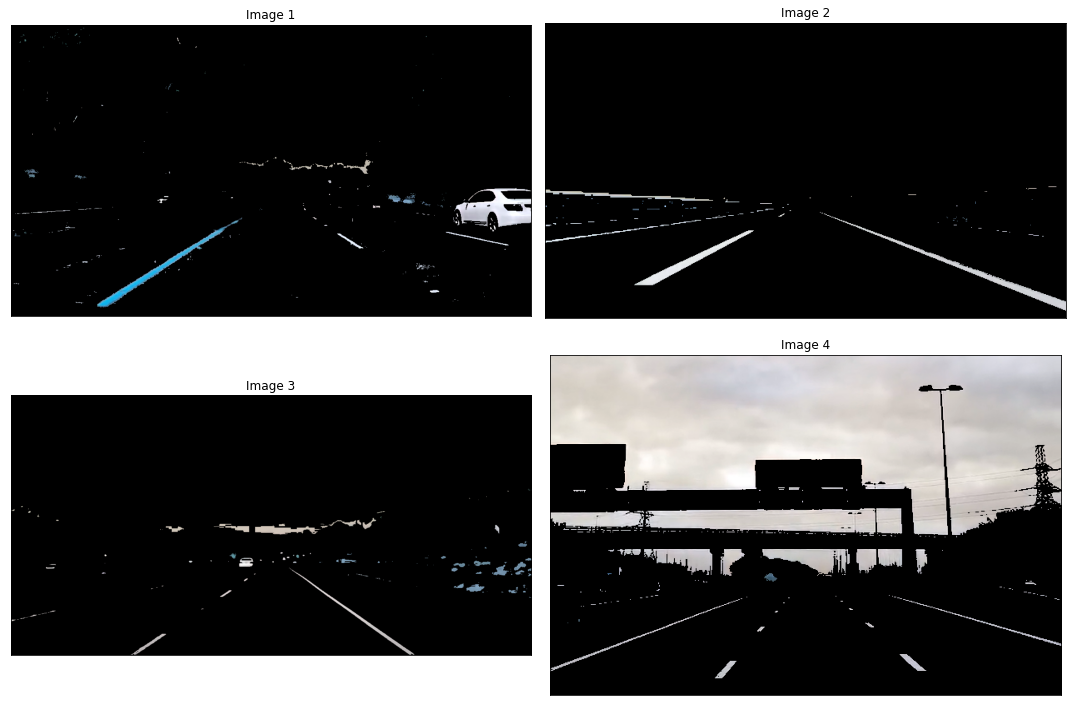

In [358]:
# For HSV, hue range is [0,179], saturation range is [0,255], and value range is [0,255]
threshold_imgs = []

# define range of 'whites' to be detected
lower_white = np.array([0, 0, 180]) # ~ [0,0,75]
upper_white = np.array([179, 30, 255]) # ~ [360,10,100]


# define range of 'yellows' to be detected
lower_yellow = np.array([15, 80, 100]) # ~ [30,31,40]
upper_yellow = np.array([45, 255, 255]) # ~ [90,100,100]

for x in images:

    # Convert BGR to HSV
    hsv = cv2.cvtColor(x, cv2.COLOR_BGR2HSV)

    # Threshold the HSV image to get only white colors
    mask_white = cv2.inRange(hsv, lower_white, upper_white)

    # Threshold the HSV image to get only yellow colors
    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)

    # Combine the mask
    mask = cv2.bitwise_or(mask_white, mask_yellow)

    # Apply the mask
    res = cv2.bitwise_and(x, x, mask=mask)

    threshold_imgs.append(res)

display_imgs(threshold_imgs[0], threshold_imgs[1], threshold_imgs[2], threshold_imgs[3])

### Edge detection using Canny

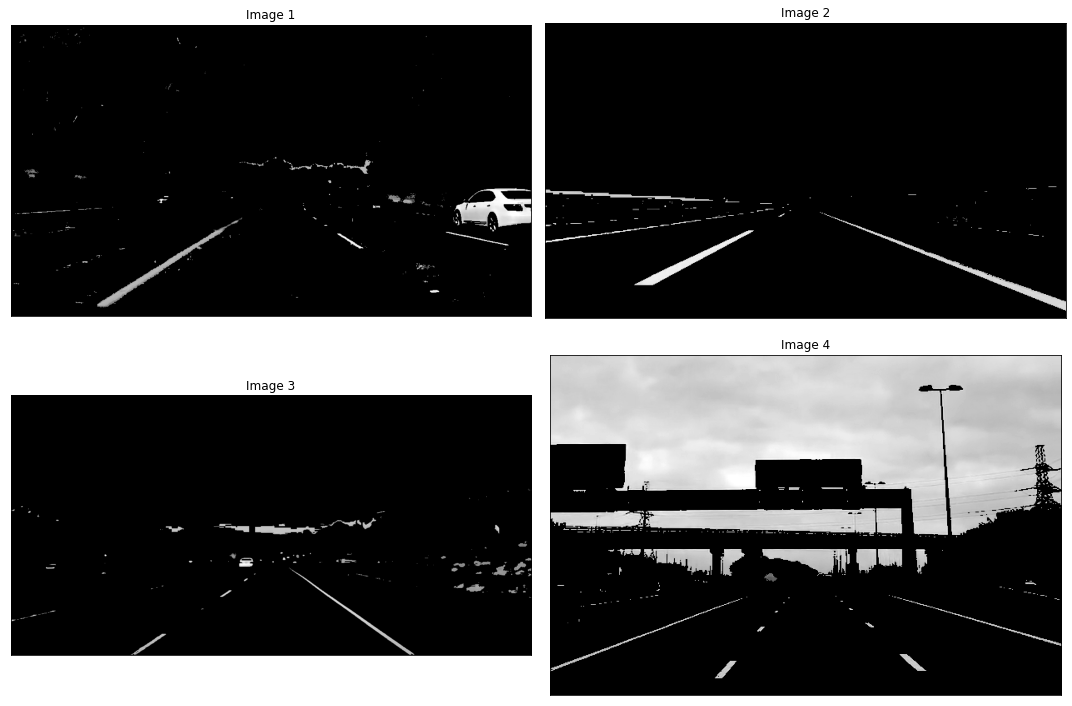

In [359]:
canny_imgs = []
for x in threshold_imgs:

    # Convert to grayscale
    gray = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blur = cv2.GaussianBlur(gray, (15, 15), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blur, 50, 300)
    
    canny_imgs.append(gray)

display_imgs(canny_imgs[0], canny_imgs[1], canny_imgs[2], canny_imgs[3], cmap='gray')


### Region of interest

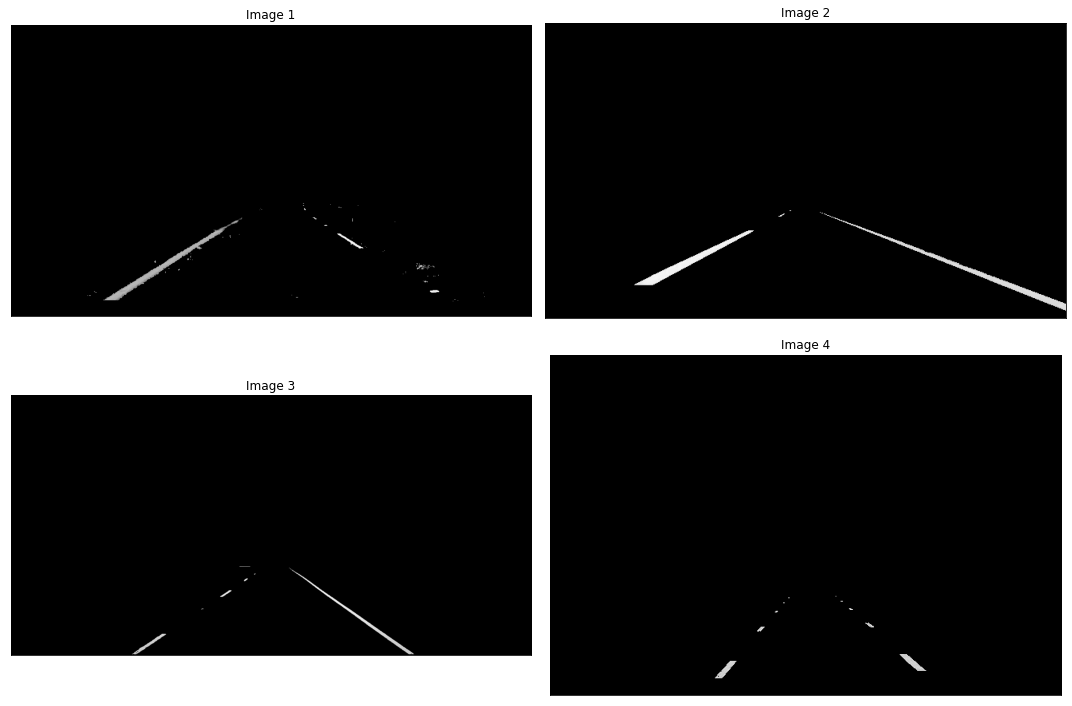

In [360]:
imgs_after_roi = []

# define the polygon by vertices
roi1 = np.array([[(0, 507), (450, 330), (650, 330), (950, 511)]], dtype=np.int32)
roi2 = np.array([[(0, 370), (290, 235), (340, 235), (700, 370)]], dtype=np.int32)
roi3 = np.array([[(0, 695), (600, 460), (752, 460), (1400, 695)]], dtype=np.int32)
roi4 = np.array([[(0, 405), (290, 275), (340, 275), (610, 405)]], dtype=np.int32)
rois = [roi1, roi2, roi3, roi4]

i = 0
for x in canny_imgs:
    # create a mask using the polygon
    mask = np.zeros_like(x)

    cv2.fillPoly(mask, rois[i], 255)
    i += 1
    # apply the mask to the canny edge detected image
    img_roi = cv2.bitwise_and(x, mask)

    imgs_after_roi.append(img_roi)

# display the images with the mask on them
display_imgs(imgs_after_roi[0], imgs_after_roi[1], imgs_after_roi[2], imgs_after_roi[3], cmap='gray')


### Apply Hough Transform to detect lines

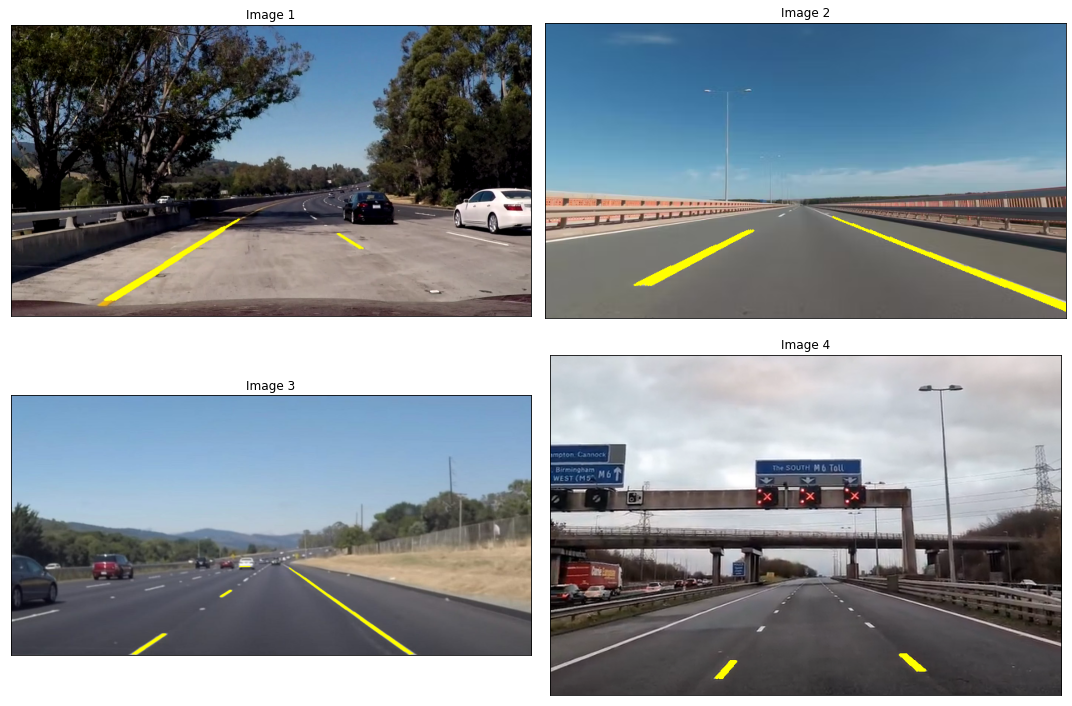

In [361]:
k = -1
imgs_lines = []
for x in imgs_after_roi:
    k += 1
    lines = cv2.HoughLinesP(x, 1, np.pi/180, 20, minLineLength=20, maxLineGap=1)
    imgs_lines.append(lines)
    if lines is not None:
        for line in lines:
            for x1,y1,x2,y2 in line:
                cv2.line(imgs_copy[k], (x1, y1), (x2, y2), [0, 255, 255], 2)
display_imgs(imgs_copy[0], imgs_copy[1], imgs_copy[2], imgs_copy[3], cmap='bgr')

### Fix the lines

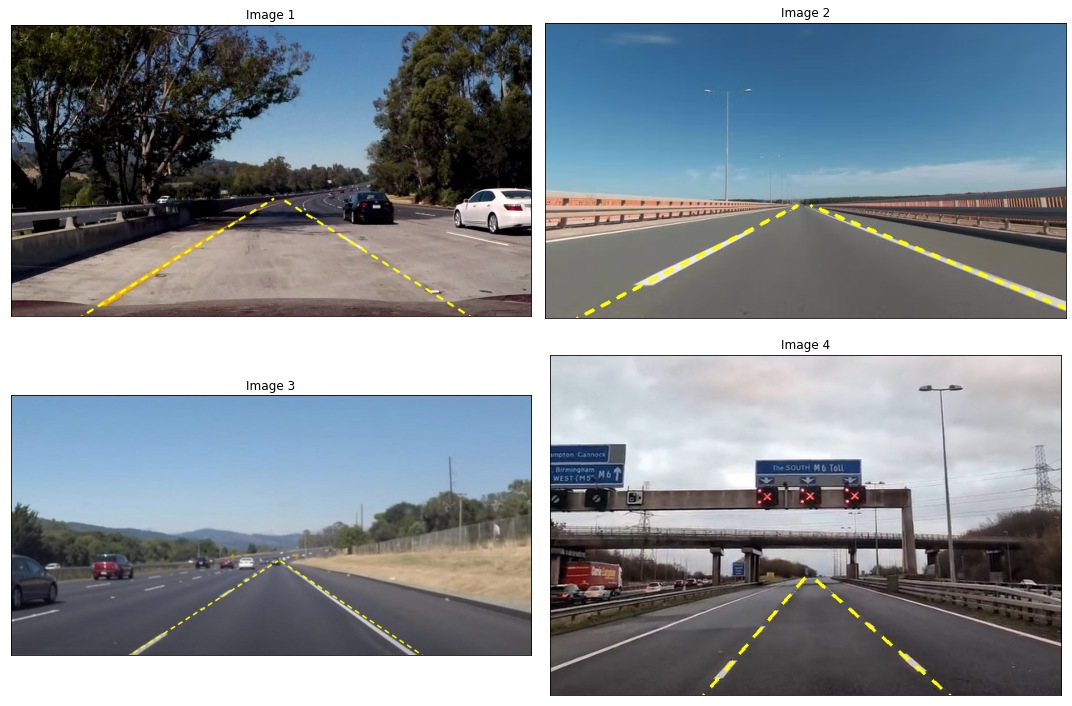

In [362]:
def bresenham_line(x0, y0, x1, y1):
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    sx = 1 if x0 < x1 else -1
    sy = 1 if y0 < y1 else -1
    err = dx - dy
    points = []
    while True:
        points.append((x0, y0))
        if x0 == x1 and y0 == y1:
            break
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x0 += sx
        if e2 < dx:
            err += dx
            y0 += sy
    return points

def draw_dotted_line(img, x0, y0, x1, y1, color=(0, 255, 255), thickness=4, gap=10):
    points = bresenham_line(x0, y0, x1, y1)
    n_points = len(points)
    draw = True
    for i in range(n_points):
        if draw:
            cv2.circle(img, points[i], thickness // 2, color=color, thickness=-1)
        if i % gap == 0:
            draw = not draw

for i in range(len(images)):
    # Separate lines into left and right lanes based on slope
    left_lines = []
    right_lines = []
    for line in imgs_lines[i]:
        for x1, y1, x2, y2 in line:
            slope = (y2 - y1) / (x2 - x1)
            if slope < 0:
                left_lines.append([slope, y1 - slope * x1])
            else:
                right_lines.append([slope, y1 - slope * x1])

    # Calculate average slope and intercept for left and right lanes
    left_slope, left_intercept = np.mean(left_lines, axis=0)
    right_slope, right_intercept = np.mean(right_lines, axis=0)

    # Determine endpoints of left and right lanes
    # Prevent line intersection by limiting y coordinates
    
    y1 = images[i].shape[0]
    if i == 0:
        y2 = int(y1 * 0.6)
    elif i == 1:
        y2 = int(y1 * 0.62)
    elif i == 2:
        y2 = int(y1 * 0.64)
    elif i == 3:
        y2 = int(y1 * 0.66)
    left_x1 = int((y1 - left_intercept) / left_slope)
    left_x2 = int((y2 - left_intercept) / left_slope)
    right_x1 = int((y1 - right_intercept) / right_slope)
    right_x2 = int((y2 - right_intercept) / right_slope)

    # Draw left and right lanes
    draw_dotted_line(images[i], left_x1, y1, left_x2, y2)
    draw_dotted_line(images[i], right_x1, y1, right_x2, y2)

display_imgs(images[0], images[1], images[2], images[3], cmap='bgr')


644
575
750
290


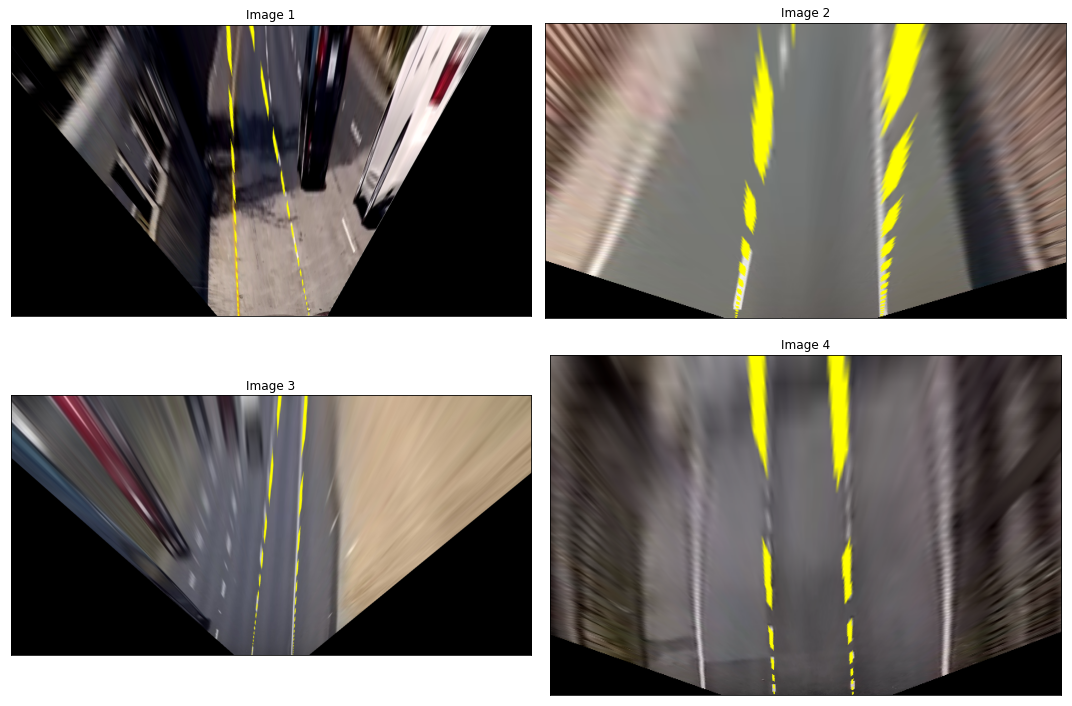

In [364]:
imgs_lane_width = [644,575,750,290]
warped_imgs = []
for i in range(len(rois)):
    # define source points
    src = rois[i].astype(np.float32)
    
    # define destination points
    lane_width_px = imgs_lane_width[i]
    print(lane_width_px)

# Define destination points
    dst = np.float32([[images[i].shape[1]/2 - lane_width/2, images[i].shape[0]], 
                  [images[i].shape[1]/2 - lane_width/2, 0], 
                  [images[i].shape[1]/2 + lane_width/2, 0], 
                  [images[i].shape[1]/2 + lane_width/2, images[i].shape[0]]])    # compute perspective transformation matrix
    M = cv2.getPerspectiveTransform(src, dst)
    
    # apply perspective transformation
    warped = cv2.warpPerspective(images[i], M, (images[i].shape[1], images[i].shape[0]), flags=cv2.INTER_LINEAR)
    warped_imgs.append(warped)

display_imgs(warped_imgs[0], warped_imgs[1], warped_imgs[2], warped_imgs[3], cmap='bgr')
